In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from collections import Counter
import numpy as np


%matplotlib inline

In [46]:
# quick function to find average occurence
def average(letters):
    # get frequency of each letter
    letters_dict = Counter(letters)

    # average out
    freq_list = list()
    for i in letters_dict:
        freq_list.append(letters_dict[i])
    
    return sum(freq_list) / len(freq_list)

In [17]:
# function to grab all occurances of letters
def gather(sizelist):
    totallist = list()
    
    for i in sizelist:
        for j in str(i):
            if not j.isdigit() and not j.isspace():
                totallist.append(j)
            
    return totallist

In [80]:
# function to plot
def barplot(data, average, index):
    fig = plt.figure(figsize=(10,10))

    # organize data to fit needs
    labels, values = zip(*Counter(data).items())

    indexes = np.arange(len(labels))
    width = 1

    plt.bar(indexes, values, width)
    plt.xticks(indexes + width * 0.5, labels)

    # some labels
    labels = ['Smaller than a Planet', 'Size of the Solar System', 'Larger than a Solar System']
    
    plt.title(labels[index])
    plt.ylabel('Frequency')

    # add average line
    plt.axhline(y=average, ls='--', label='Average Occurance')
    plt.legend()
    
    return fig

In [4]:
# functions done, so now to get df
df = pd.read_excel('Our_Vocabulary_Spr_2020.xlsx', sheet_name='FINAL words 06.04.20')

df = df[df['Agreement'].notna()]

df = df[['WORD', 'Word', 'Agreement']]

In [18]:
# split df according to size
big_list, med_list, small_list = list(), list(), list()
for i in range(len(df['Agreement'])):
    size = list(df['Agreement'])[i].split('.')
    
    if len(size) == 3:
        size = size[1]

        if size == 'big':
            big_list.append(list(df['Word'])[i])
        if size == 'medium':
            med_list.append(list(df['Word'])[i])
        if size == 'small':
            small_list.append(list(df['Word'])[i])

In [51]:
# get occurances of letters
big_overall = gather(big_list)
med_overall = gather(med_list)
small_overall = gather(small_list)

# get frequencies of letters
big_avg = average(big_overall)
med_avg = average(med_overall)
small_avg = average(small_overall)

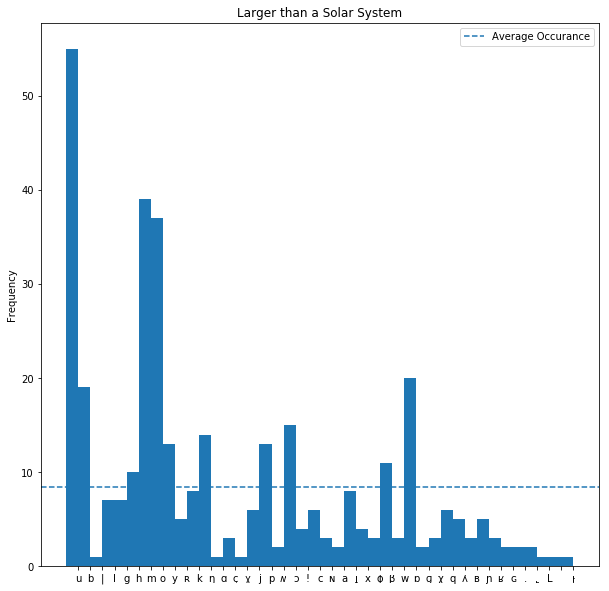

In [81]:
big_fig = barplot(big_overall, big_avg, 2)
big_fig.savefig('big_ling10k')

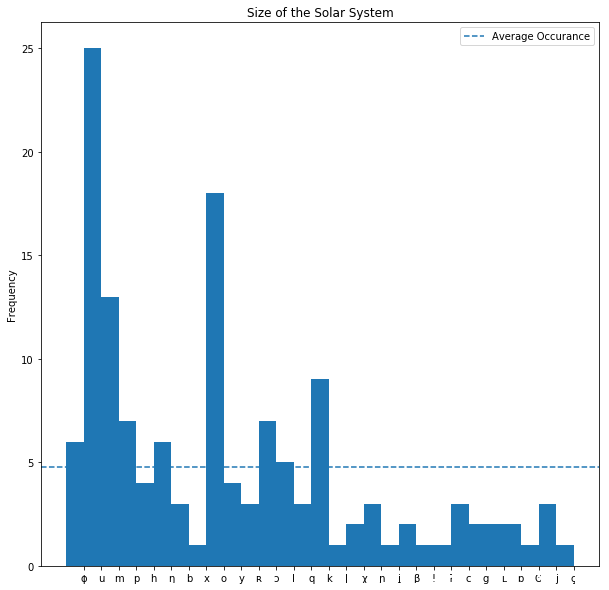

In [82]:
med_fig = barplot(med_overall, med_avg, 1)
med_fig.savefig('med_ling80k')

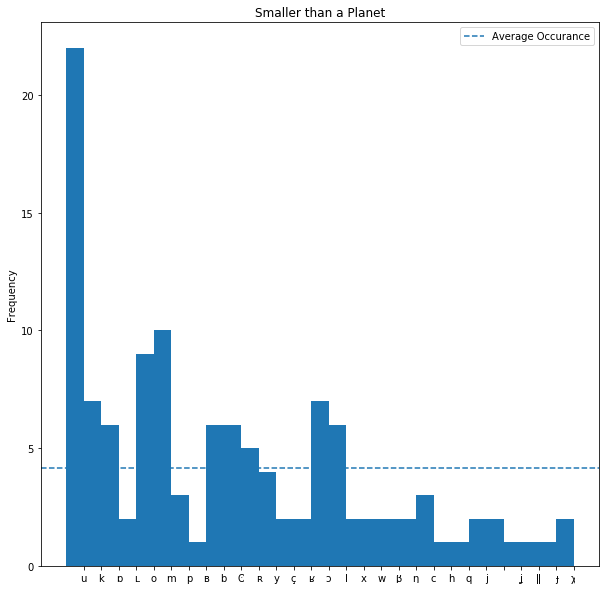

In [83]:
small_fig = barplot(small_overall, small_avg, 0)
small_fig.savefig('small_ling80k')